In [10]:
import os
import sys
from pathlib import Path
# Setting the working directory to the root of the project
project_dir = Path("C:/Users/adbou/source/repos/KFHXRelatedAi/")
os.chdir(project_dir)

from Configs.GeneralPaths import SOURCEDATA
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [11]:
#load user profiles data
user_profiles = pd.read_excel(Path(SOURCEDATA / "User_Profiles_Reports.xlsx"))
user_profiles.head()
user_profiles.info()

In [ ]:
user_profiles.head()

,FK_BusinessUserId,total_transactions,total_amount_spent,avg_points_rewarded,avg_amount_spent,total_amount_mcc_763,total_amount_mcc_3038,total_amount_mcc_3583,total_amount_mcc_4111,total_amount_mcc_4225,total_amount_mcc_4468,total_amount_mcc_4814,total_amount_mcc_4900,total_amount_mcc_5047,total_amount_mcc_5085,total_amount_mcc_5099,total_amount_mcc_5111,total_amount_mcc_5131,total_amount_mcc_5199,total_amount_mcc_5261,total_amount_mcc_5262,total_amount_mcc_5300,total_amount_mcc_5309,total_amount_mcc_5310,total_amount_mcc_5399,total_amount_mcc_5499,total_amount_mcc_5533,total_amount_mcc_5651,total_amount_mcc_5712,total_amount_mcc_5732,total_amount_mcc_5733,total_amount_mcc_5812,total_amount_mcc_5815,total_amount_mcc_5816,total_amount_mcc_5817,total_amount_mcc_5818,total_amount_mcc_5940,total_amount_mcc_5942,total_amount_mcc_5944,total_amount_mcc_5947,total_amount_mcc_5949,total_amount_mcc_5960,total_amount_mcc_5962,total_amount_mcc_5965,total_amount_mcc_5967,total_amount_mcc_5968,total_amount_mcc_5969,total_amount_mcc_5970,total_amount_mcc_5972,total_amount_mcc_5977,total_amount_mcc_5992,total_amount_mcc_5993,total_amount_mcc_5995,total_amount_mcc_5999,total_amount_mcc_6300,total_amount_mcc_6540,total_amount_mcc_7211,total_amount_mcc_7216,total_amount_mcc_7221,total_amount_mcc_7230,total_amount_mcc_7251,total_amount_mcc_7273,total_amount_mcc_7277,total_amount_mcc_7297,total_amount_mcc_7299,total_amount_mcc_7321,total_amount_mcc_7338,total_amount_mcc_7361,total_amount_mcc_7375,total_amount_mcc_7392,total_amount_mcc_7393,total_amount_mcc_7399,total_amount_mcc_7512,total_amount_mcc_7523,total_amount_mcc_7993,total_amount_mcc_7996,total_amount_mcc_8111,total_amount_mcc_8299,total_amount_mcc_8351,total_amount_mcc_8398,total_amount_mcc_8911,total_amount_mcc_8999,total_amount_mcc_9399,recency,most_common_day_of_week,most_common_month,most_common_season,most_frequent_mcc,most_frequent_location,763,3038,3583,4111,4225,4468,4814,4900,5047,5085,5099,5111,5131,5199,5261,5262,5300,5309,5310,5399,5499,5533,5651,5712,5732,5733,5812,5815,5816,5817,5818,5940,5942,5944,5947,5949,5960,5962,5965,5967,5968,5969,5970,5972,5977,5992,5993,5995,5999,6300,6540,7211,7216,7221,7230,7251,7273,7277,7297,7299,7321,7338,7361,7375,7392,7393,7399,7512,7523,7993,7996,8111,8299,8351,8398,8911,8999,9399,unique_mccs,weekend_transactions,weekday_transactions,avg_transactions_per_month,R,F,M,RFM_Score,RFM_Segment
0,976481,54,1136.25,210.148148,21.041667,0.0,204.53,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.25,460.49,32.0,147.92,0.00,5.00,0.0,0.00,0.0,0.00,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,68.06,24,0,4,2,5499,KW,0.0,0.055556,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.037037,0.611111,0.018519,0.111111,0.000000,0.018519,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.092593,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.018519,0.0,0.0,0.0,0.000000,0.0,0.0,0.037037,9,15,39,7.714286,5,5,5,5,Champions
1,976482,40,422.74,105.150000,10.568500,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,138.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,73.59,0.0,24.40,14.55,25.50,0.0,105.75,0.0,0.00,0.0,0.0,0.0,16.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.1,0,0.00,0.0,0.0,0.0,5.95,0.0,0.0,0.0,0.0,0.0,0.0,0.00,76,0,4,1,5812,KW,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.025000,0.050000,0.025000,0.0,0.475000,0.0,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000

In [ ]:
columns_for_clustering = ['most_frequent_mcc', 'RFM_Score']

In [ ]:
user_profile_for_cluster = user_profiles[columns_for_clustering]

In [ ]:
user_profile_for_cluster

,most_frequent_mcc,R,F,M
0,5499,5,5,5
1,5812,3,5,5
2,5812,5,5,5
3,5812,5,5,5
4,5812,5,5,5
...,...,...,...,...
17820,5499,5,1,2
17821,8299,5,1,4
17822,5499,5,1,3
17823,5499,5,1,1


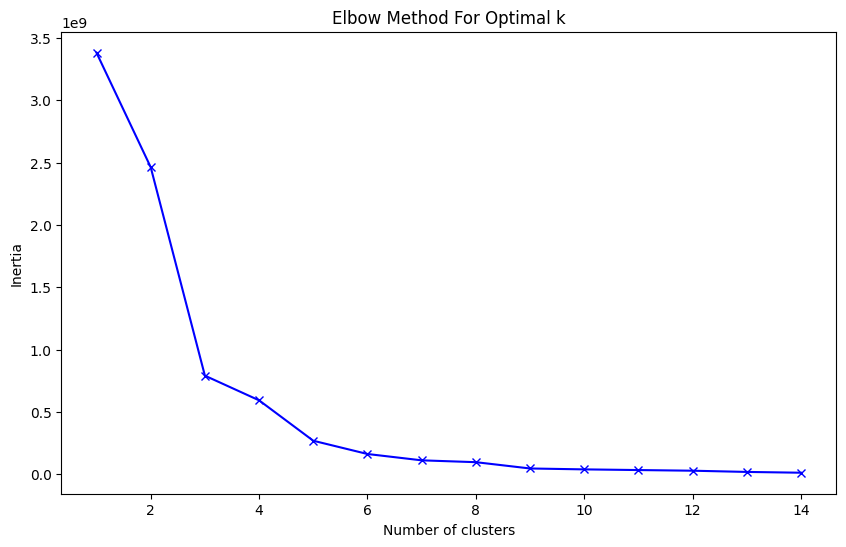

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for a range of cluster numbers
inertia = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(user_profile_for_cluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

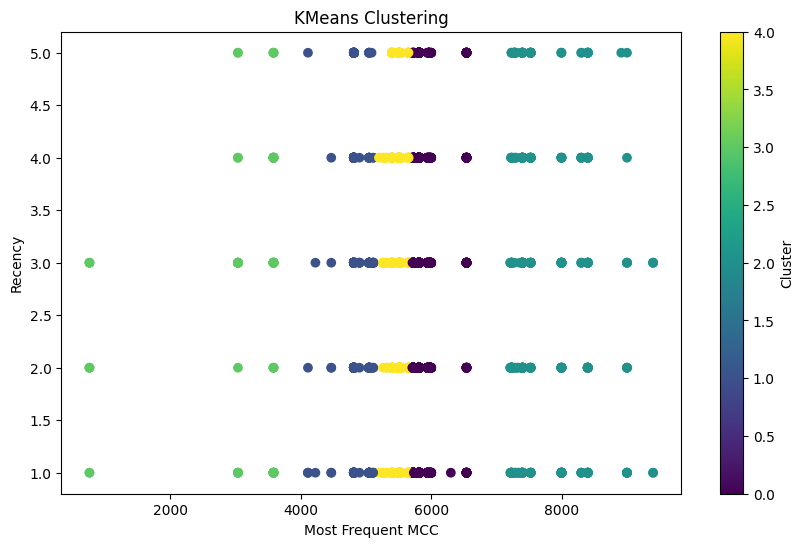

In [ ]:
# Applying KMeans with the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
user_profiles['cluster'] = kmeans.fit_predict(user_profile_for_cluster)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(user_profiles['most_frequent_mcc'], user_profiles['RFM_Score'], c=user_profiles['cluster'], cmap='viridis')
plt.xlabel('Most Frequent MCC')
plt.ylabel('RFM_Score')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()